# What is the relationship between a country's Gross Domestic Product and the performance of their national soccer teams in international matches?

## Introduction

Soccer is the most popular sport in the world, with millions of fans every year watching their country battle it out for victory. The simple yet competitive premise of the sport has allowed it to spread across almost every country in the world, from the poorest corners of the globe to the richest. **TALK ABOUT THE STATISTICS OF SOUTH AMERICA AND EUROPE, COMPARE SOUTH AMERICA AND EUROPE AND AFRICA AND THE US. FIND THE GDP DIFFERENCE. COMPARE DATA**
 so we want to find out if a country’s Gross Domestic Product (GDP) affects its national soccer team’s performance. 


To answer this, we will be taking the GDP data sets from the International Monetary Fund which includes the GDP Per Capita, GDP Growth, and Total GDP Per Country. As well, the national soccer data set for the World Football Elo Ratings, Rec.Sport.Soccer Statistics Foundation, and the FIFA Official Men's Ranking. The two different sets of data will be merged together and a relationship will be determined.



In [1]:
# Loading in neccessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

We will assign a single value to represent the ratio of their collective wins, draws, and losses. Combining these categories together allows us to find the most successful soccer team quickly and objectively. We filter the soccer dataset to include the 147 best performing countries and filter the GDP of those 147 countries in our GDP dataset. We can split this data into a training and testing set and use knn-regression on the training set. Using a scatter plot, we will compare the GDP to the soccer success percentage, where each plot represents a country. We will separate this data again to focus on two of the most successful soccer continents: Europe and South America. We will filter the countries in our original sample that do not belong to Europe or South America.

This gives a dataset of countries belonging to the continents we want, and we’ll split this again by filtering for South American countries and then for European countries. For both continent datasets, we will create a training and testing set, plotting their training data as scatter plots and using k-nn regression.


//TALK ABOUT HOW P3+ is the best predictor
//Look at P% too

## Importing Data Sets from the Internet

### International Monetary Fund (Gross Domestic Product Per Capita) Data Frame



The dataset contains the country and columns of years from 1980 to 2027. Each column contains data of the GDP Per Capita in US Dollars.



In [2]:

# Columns in the data source:
# Country - The country that has the GDP per Capita as rows
# 1980:2027 - The GDP per Capita for the year (US Dollars)

# Loading IMF data for country GDP Per Capita from 1980 to 2027
country_gdp_capita <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/Country_GDP_Capita_IMF.csv?raw=TRUE", 
                               show_col_types = FALSE)
country_gdp_capita

Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,582.323,586.204,611.268,NA,NA,NA,NA,NA,NA,NA
Albania,728.359,817.734,824.542,815.529,788.332,788.801,855.724,832.245,805.046,⋯,5257.714,5345.058,5268.239,6373.300,6369.009,6591.682,6968.694,7470.082,7958.016,8469.507
Algeria,2268.607,2305.505,2254.328,2316.679,2432.717,2753.697,2698.915,2705.111,2143.742,⋯,4118.839,3953.576,3304.865,3659.531,4151.437,4162.176,4242.401,4371.569,4523.644,4637.342
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Other advanced economies,6886.485,6930.571,6792.923,6699.744,6948.341,6861.781,8292.104,10106.092,11787.179,⋯,44142.030,43022.850,42555.028,48965.722,49580.11,51398.605,53529.015,55708.932,57993.545,60331.76
Sub-Saharan Africa,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1760.388,1727.391,1591.065,1746.345,1849.62,1933.069,2043.649,2160.323,2287.835,2421.53
World,2862.333,2876.220,2772.215,2797.085,2846.673,2920.230,3376.821,3820.734,4222.994,⋯,11489.302,11558.645,11155.514,12616.281,13396.10,13923.716,14522.871,15149.837,15810.007,16490.80


### International Monetary Fund (Gross Domestic Product Growth Per Year) Data Frame

In [ ]:
The dataset contains the country and GDP Growth from years 1980 to 2027. 


In [7]:
# Each column contains data of the percent annual change of GDP from the previous year, which could also be applied to GDP Per Capita.

# Columns in the data source:
# Country - The country that has the GDP Growth as rows
# 1980:2027 - The GDP Growth (%) for the year from the previous year

# Loading IMF data for country GDP Growth from 1980 to 2027
country_gdp_growth <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/Country_GDP_Growth_IMF.csv?raw=TRUE", 
                               show_col_types = FALSE)
country_gdp_growth

Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.2,3.9,-2.4,NA,NA,NA,NA,NA,NA,NA
Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,⋯,4.0,2.1,-3.5,8.5,4.0,2.5,3.2,3.2,3.4,3.4
Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,⋯,1.2,1.0,-5.1,3.5,4.7,2.6,2.0,1.9,1.9,1.7
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Other advanced economies,3.8,4.2,2.2,4.0,6.6,4.3,5.5,6.5,5.5,⋯,2.8,2.0,-1.7,5.3,2.8,2.3,2.6,2.3,2.3,2.2
Sub-Saharan Africa,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3.3,3.2,-1.6,4.7,3.6,3.7,4.1,4.2,4.3,4.4
World,2.1,2.0,0.7,2.7,4.6,3.7,3.6,3.9,4.7,⋯,3.6,2.8,-3.0,6.0,3.2,2.7,3.2,3.4,3.3,3.2


### International Monetary Fund (Gross Domestic Product) Data Frame

The dataset contains the country and columns of years from 1980 to 2027. Each column contains data of the GDP in billions of US Dollars.

In [4]:

# Columns in the data source:
# Country - The country that has the GDP as rows
# 1980:2027 - The GDP for the year (Billions of US Dollars)

# Loading IMF data for country GDPs from 1980 to 2027
country_gdp <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/Country_GDP_Total.csv?raw=TRUE", 
                               show_col_types = FALSE)
country_gdp

Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,18.401,18.876,20.136,NA,NA,NA,NA,NA,NA,NA
Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,⋯,15.157,15.399,15.161,18.310,18.256,18.842,19.858,21.219,22.528,23.889
Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,⋯,175.372,171.680,144.922,162.711,187.155,190.254,196.624,205.435,215.544,224.042
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Other advanced economies,775.140,790.704,785.510,783.949,821.762,819.320,999.282,1230.119,1450.276,⋯,7591.869,7451.064,7389.845,8489.332,8622.646,8972.755,9383.791,9808.552,10254.129,10712.425
Sub-Saharan Africa,317.448,335.785,338.575,311.794,247.323,225.913,257.448,279.859,301.583,⋯,1751.015,1762.290,1665.207,1875.600,2037.295,2183.815,2367.799,2566.868,2788.197,3027.991
World,11238.265,11498.276,11286.618,11589.045,12001.655,12531.040,14776.085,17013.016,19131.406,⋯,86209.627,87654.342,85440.667,97076.276,101560.901,106181.924,111882.430,118042.546,124648.359,131630.732


### Continents and Countries Data Frame



We are using this dataset to pair a country with its continent. The IMF does not provide the continent with the dataset. This will help our data when we are separating our soccer data based on continents. 


In [ ]:

# Columns from the data source website:
# Entity - The name of the country
# Code - The codename of the country
# Year - The Year the data is obtained
# Continent - The continent the country belongs to

# Only the Entity and Continents columns will be selected because the other columns are redundant to our investigation.

# Loading the Countries to Continents
continents <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/continents-according-to-our-world-in-data.csv?raw=TRUE", 
                       show_col_types = FALSE) |> select(Entity, Continent)
continents

### World Football Elo Ratings Dataframe

### Introduction to ELO Rating System

**What is an ELO System**

**Basically paraphrase this and all the equations**
https://www.eloratings.net/about

**Explain how FIFA Uses this ELO Rating System too**
https://www.fifa.com/fifa-world-ranking/procedure-men

**Explain why a ELO Rating system is better than other detemining factors (More international rather than continental, friendly and tornaments have different weights, home and away advantage is accounted for, there is a lot more just point out a few**

**Previous Years ELO carries over to the New Years ELO**

https://digitalhub.fifa.com/m/f99da4f73212220/original/edbm045h0udbwkqew35a-pdf.pdf

**Earliest Data is from 1901** but has very little soccer games

The data below is from World Football Elo Ratings at eloratings.net as of December 01, 2022. The ELO rating and match statistics are obtained from FIFA's official website and the Rec.Sport.Soccer Statistics Foundation. ELO Ratings are calculated using FIFA official algorithm and includes data from recent matches.

****Column Legend:****

team: The country of the soccer team

rating: The official FIFA ELO rating as of December 01, 2022

average_rank: The average rank from the 239 countries (Measured from ELO Rating)

average_rating: The average ELO Rating during the year of 2022

total_matches: The total number of matches played during the 2022 season

home_matches: The total number of matches the country has played at home

away_matches: The total number of matches the country has played at another pitch

neutral_matches: The total number of matches played at neither an away or home pitch

wins: The number of wins

losses: The number of losses

draws: The number of draws

goals_for: The number of goals the country has scored in a season

goals_against: The number of goals scored against the country

In [6]:

# Loading training soccer_elo_data for international matches from 1930 - 2020
soccer_elo_data <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/SoccerDataFifaWorldCupRanking.csv?raw=TRUE",
                            show_col_types = FALSE)

soccer_elo_data

team,rating,average_rank,average_rating,total_matches,home_matches,away_matches,neutral_matches,wins,losses,draws,goals_for,goals_against
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brazil,2195,4,1999,1028,364,331,333,656,161,211,2233,912
Argentina,2118,5,1984,1064,368,405,291,575,226,263,2006,1109
Netherlands,2047,15,1844,856,405,346,105,440,230,186,1779,1091
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Eastern Samoa,472,222,473,51,0,13,38,4,45,2,30,340
Northern Mariana Islands,404,229,524,28,3,11,14,3,23,2,33,121
Palau,403,233,403,2,2,0,0,0,2,0,3,27


### DEPRECATED World Championship (Final Tournaments + Qualifying) All-time-table 1930-2014 (20 tournaments)

The following dataset looks at all the matches played during the FIFA World Cup and determines the statistics of every soccer team as if it was a league table. This is the main data used in our training which will contain all the past international matches each country has played,  which includes both qualifying and tournament matches.

In [ ]:

# Columns:
# WC1: number of world championships played 
# WC2: uninterrupted participation in the last world cups (+) 
#      World cups missed since last participation (-)
# FT:  Final tournaments reached
# QS:  missed qualification for final tournament
# FT1: Number of final tournaments played 
# FT2: Consecutive final tournaments played (+) consecutive final tournaments missed (-)
# G:   Games
# W:   Wins
# D:   Draws
# L:   Loses
# G+:  Number of Goals scored
# G-:  Number of Goals Scored Against
# GD:  goal difference (G+) - (G-)
# P2+: points according to 2 points/win
# P%:  success percentage (=(Wins+Draw/2)/G)
# P+:  points actually obtained
# P3+: points according to 3 points/win

# Loading training soccer_data from World Cup data of all time from 1930 - 2020
# soccer_data <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/SoccerDataWorldCupALL.csv?raw=TRUE", show_col_types = FALSE)
# soccer_data

### DEPRECATED World Championship (Final Tournaments) All-time-table 1930-2014 (20 tournaments) Data Frame 

In [8]:
# Testing data that looks at world cup performance at World Cup Championship Final Tournaments only (no qualifying). 
# The following dataset looks at all the matches played during the FIFA World Cup and determines the statistics of every soccer team as if it was a league table.

# Columns:
# - Team: Country of the Team playing
# - FT1: Number of final tournaments played 
# - FT2: Consecutive final tournaments played (+) consecutive final tournaments missed (-)
# - G:   Games
# - W:   Wins
# - D:   Draws
# - L:   Loses
# - G+:  Number of Goals scored
# - G-:  Number of Goals Scored Against
# - GD:  goal difference (G+) - (G-)
# - P2+: points according to 2 points/win
# - P%:  success percentage (=(Wins+Draw/2)/G)
# - P+:  points actually obtained
# - P3+: points according to 3 points/win

# Loading potential testing soccer_data from World Cup tournament data of all time from 1930 - 2020
# testing_soccer_data <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/SoccerDataWorldCupTournament.csv?raw=TRUE",
#                                 show_col_types = FALSE)
# testing_soccer_data

## Tidying and Wrangling Data
The first thing that we noticed about the IMF database was that it was untidy. There were multiple observations spanning the columns and not all variables shared the same column. In order to tidy the data, it is now organized into Country, Year, GDP_Capita/GDP_Growth from pivot_longer. This organization will also help combining the data with the soccer data and allow us to find the mean of the GDP from 1930 to 2027.

The wrangling that follows will combine the GDP Per Capita, GDP Growth, Soccer Statistics(Rating, Average Rating etc.), and Continent
which contain important predictor variables for our regression.

**CHANGE THIS TO MATCH THE FOLLOWING BELOW**

In [9]:
# Tidy country_gdp_capita data by pivoting it longer. The columns of 1980:2027 are pivoted such that the years fits under the column "Year" and the GDP Per Capita fall under "GDP_Capita".
# Rows with "NA" values are removed and Years are converted to numeric for the remaining steps
# Since the Elo final rating goes from 2002 to 2022, the capita will be shortened to fit in the time.
country_capita_longer <- country_gdp_capita |>
    pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP_Capita",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))
country_capita_longer

Country,Year,GDP_Capita
<chr>,<dbl>,<dbl>
Afghanistan,2002,233.433
Afghanistan,2003,233.755
Afghanistan,2004,254.259
⋮,⋮,⋮
World,2025,15149.84
World,2026,15810.01
World,2027,16490.80


In [10]:
# Tidy country_gdp_capita data by pivoting it longer. The method is similar to the step above, except saving the values of each Year to "GDP_Growth".
country_growth_longer <- country_gdp_growth |>
        pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP_Growth",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))
country_growth_longer

Country,Year,GDP_Growth
<chr>,<dbl>,<dbl>
Afghanistan,2003,8.7
Afghanistan,2004,0.7
Afghanistan,2005,11.8
⋮,⋮,⋮
World,2025,3.4
World,2026,3.3
World,2027,3.2


In [ ]:
# Tidy country_gdp data by pivoting it longer. The method is similar to the step above, except saving the values of each Year to "GDP".
country_gdp_longer <- country_gdp |>
        pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))
country_gdp_longer

In [12]:
# Performing a left_join of GDP capita data and GDP Growth. For every Country and Year, combine the GDP_Capita and GDP_Growth to be of that year
country_gdp_data <- left_join(country_capita_longer, country_growth_longer, by = c("Country", "Year"), copy = FALSE, na_matches = "na") |>
    left_join(country_gdp_longer, by = c("Country", "Year"), copy = FALSE, na_matches = "na")
country_gdp_data

Country,Year,GDP_Capita,GDP_Growth,GDP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2002,233.433,NA,4.367
Afghanistan,2003,233.755,8.7,4.553
Afghanistan,2004,254.259,0.7,5.146
⋮,⋮,⋮,⋮,⋮
World,2025,15149.84,3.4,118042.5
World,2026,15810.01,3.3,124648.4
World,2027,16490.80,3.2,131630.7


In [13]:
# Finding the Mean GDP per Capita, GDP Growth, GDP for each country, which is useful for predicting the relationship between GDP and soccer performance overall between 1980 and 2027
country_mean_gdp_data <- country_gdp_data |>
    group_by(Country) |>
    summarize(Mean_GDP_Capita = mean(GDP_Capita, na.rm = TRUE),
             Mean_GDP_Growth = mean(GDP_Growth, na.rm = TRUE),
             Mean_GDP = mean(GDP, na.rm = TRUE))

# Performing a left join on the mean GDP per capita, GDP growth, GDP and continent based on the Country
country_mean_data <- country_mean_gdp_data |> left_join(continents, by = c("Country" = "Entity"), copy = FALSE, na_matches = "na")
country_mean_data

Country,Mean_GDP_Capita,Mean_GDP_Growth,Mean_GDP,Continent
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Advanced economies,34047.0894,2.256250,34501.06379,NA
Afghanistan,528.8195,6.122222,14.03916,Asia
Africa (Region),1658.5872,3.824324,1820.69329,NA
⋮,⋮,⋮,⋮,⋮
Yemen,974.7587,2.0027027,22.69137,Asia
Zambia,894.8820,3.4104167,13.33394,Africa
Zimbabwe,1284.9607,0.7310345,17.92526,Africa


### Final Dataframe for Regression

In [31]:
# Performing an inner join to combine world cup data with Country, GDP Per Capita, and GDP Growth. The rows from the soccer_data with the same Country as the GDP dataframe will be combined.
soccer_data_combined <- country_mean_data |>
    inner_join(soccer_elo_data, by = c("Country" = "team"), copy = FALSE, na_matches = "na")
    
soccer_data_combined

Country,Mean_GDP_Capita,Mean_GDP_Growth,Mean_GDP,Continent,rating,average_rank,average_rating,total_matches,home_matches,away_matches,neutral_matches,wins,losses,draws,goals_for,goals_against
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,528.8195,6.122222,14.039158,Asia,1095,167,901,139,9,50,80,33,74,32,138,289
Albania,2945.3290,2.879167,8.571417,Europe,1543,75,1493,370,174,171,25,98,194,78,340,567
Algeria,3145.9694,2.435417,111.516458,Africa,1707,51,1630,633,238,223,172,280,186,167,948,653
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,974.7587,2.0027027,22.69137,Asia,1098,143,1215,265,53,77,135,57,159,49,256,543
Zambia,894.8820,3.4104167,13.33394,Africa,1466,59,1560,804,258,338,208,365,231,208,1282,845
Zimbabwe,1284.9607,0.7310345,17.92526,Africa,1318,79,1468,489,182,196,111,193,159,137,665,568


## Visualizing GDP and Multiple World Cup Stats

We will be comparing the GDP and All Time World Cup statistics to determine the relationships developed between the two. We will also be classifying each point by their continent as we believe that it has a major influence on the GDP disparity.



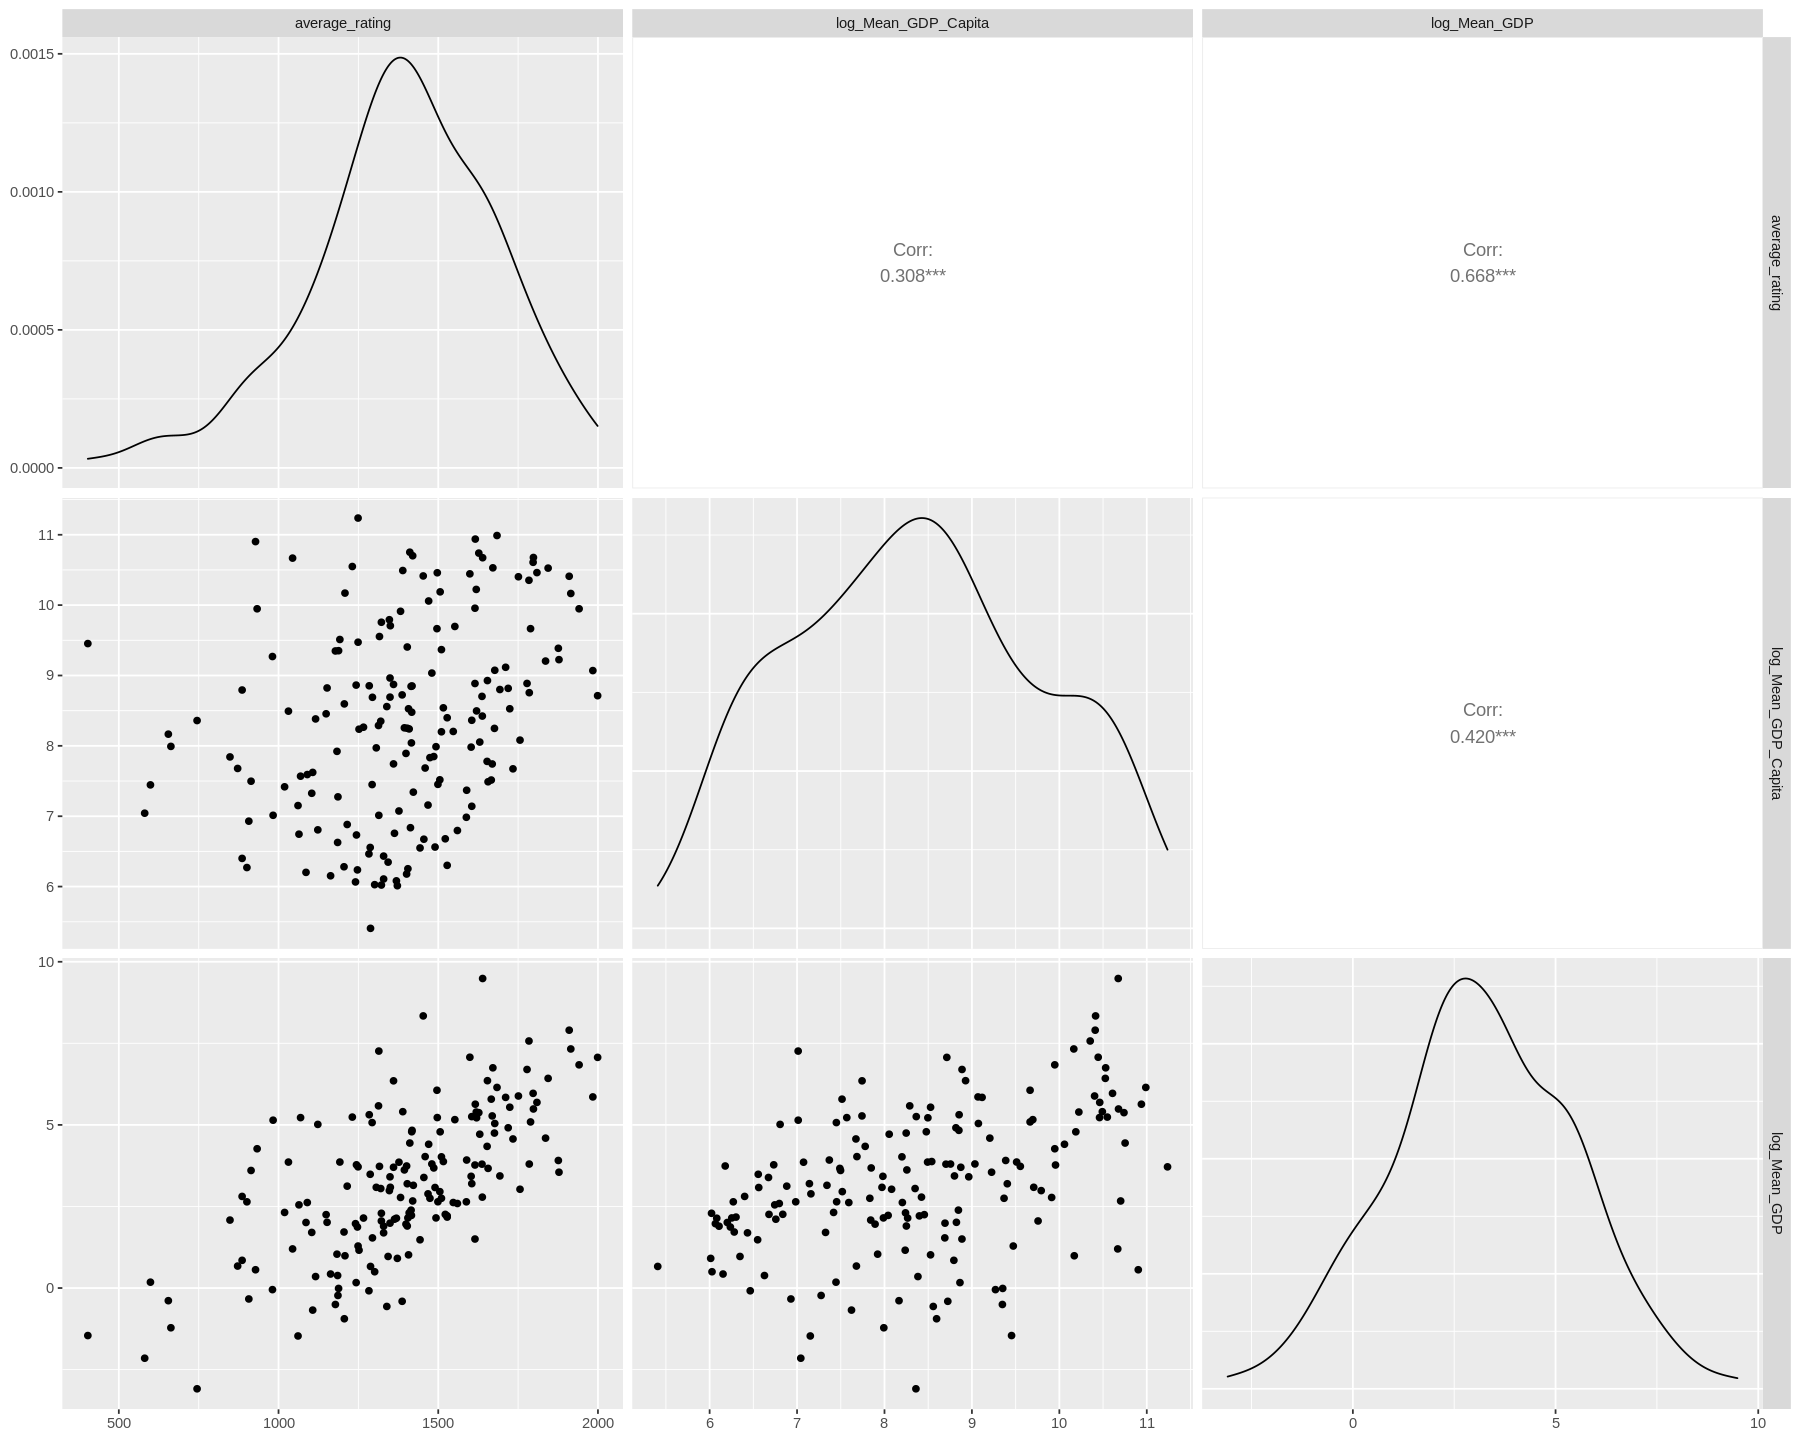

In [29]:
# By ggpairs, we can determine the relationship between all the variables from soccer_data_combined.
options(repr.plot.width = 15, repr.plot.height = 12)

soccer_data_combined |>
    select(-Country, -Continent) |> 
    ggpairs()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


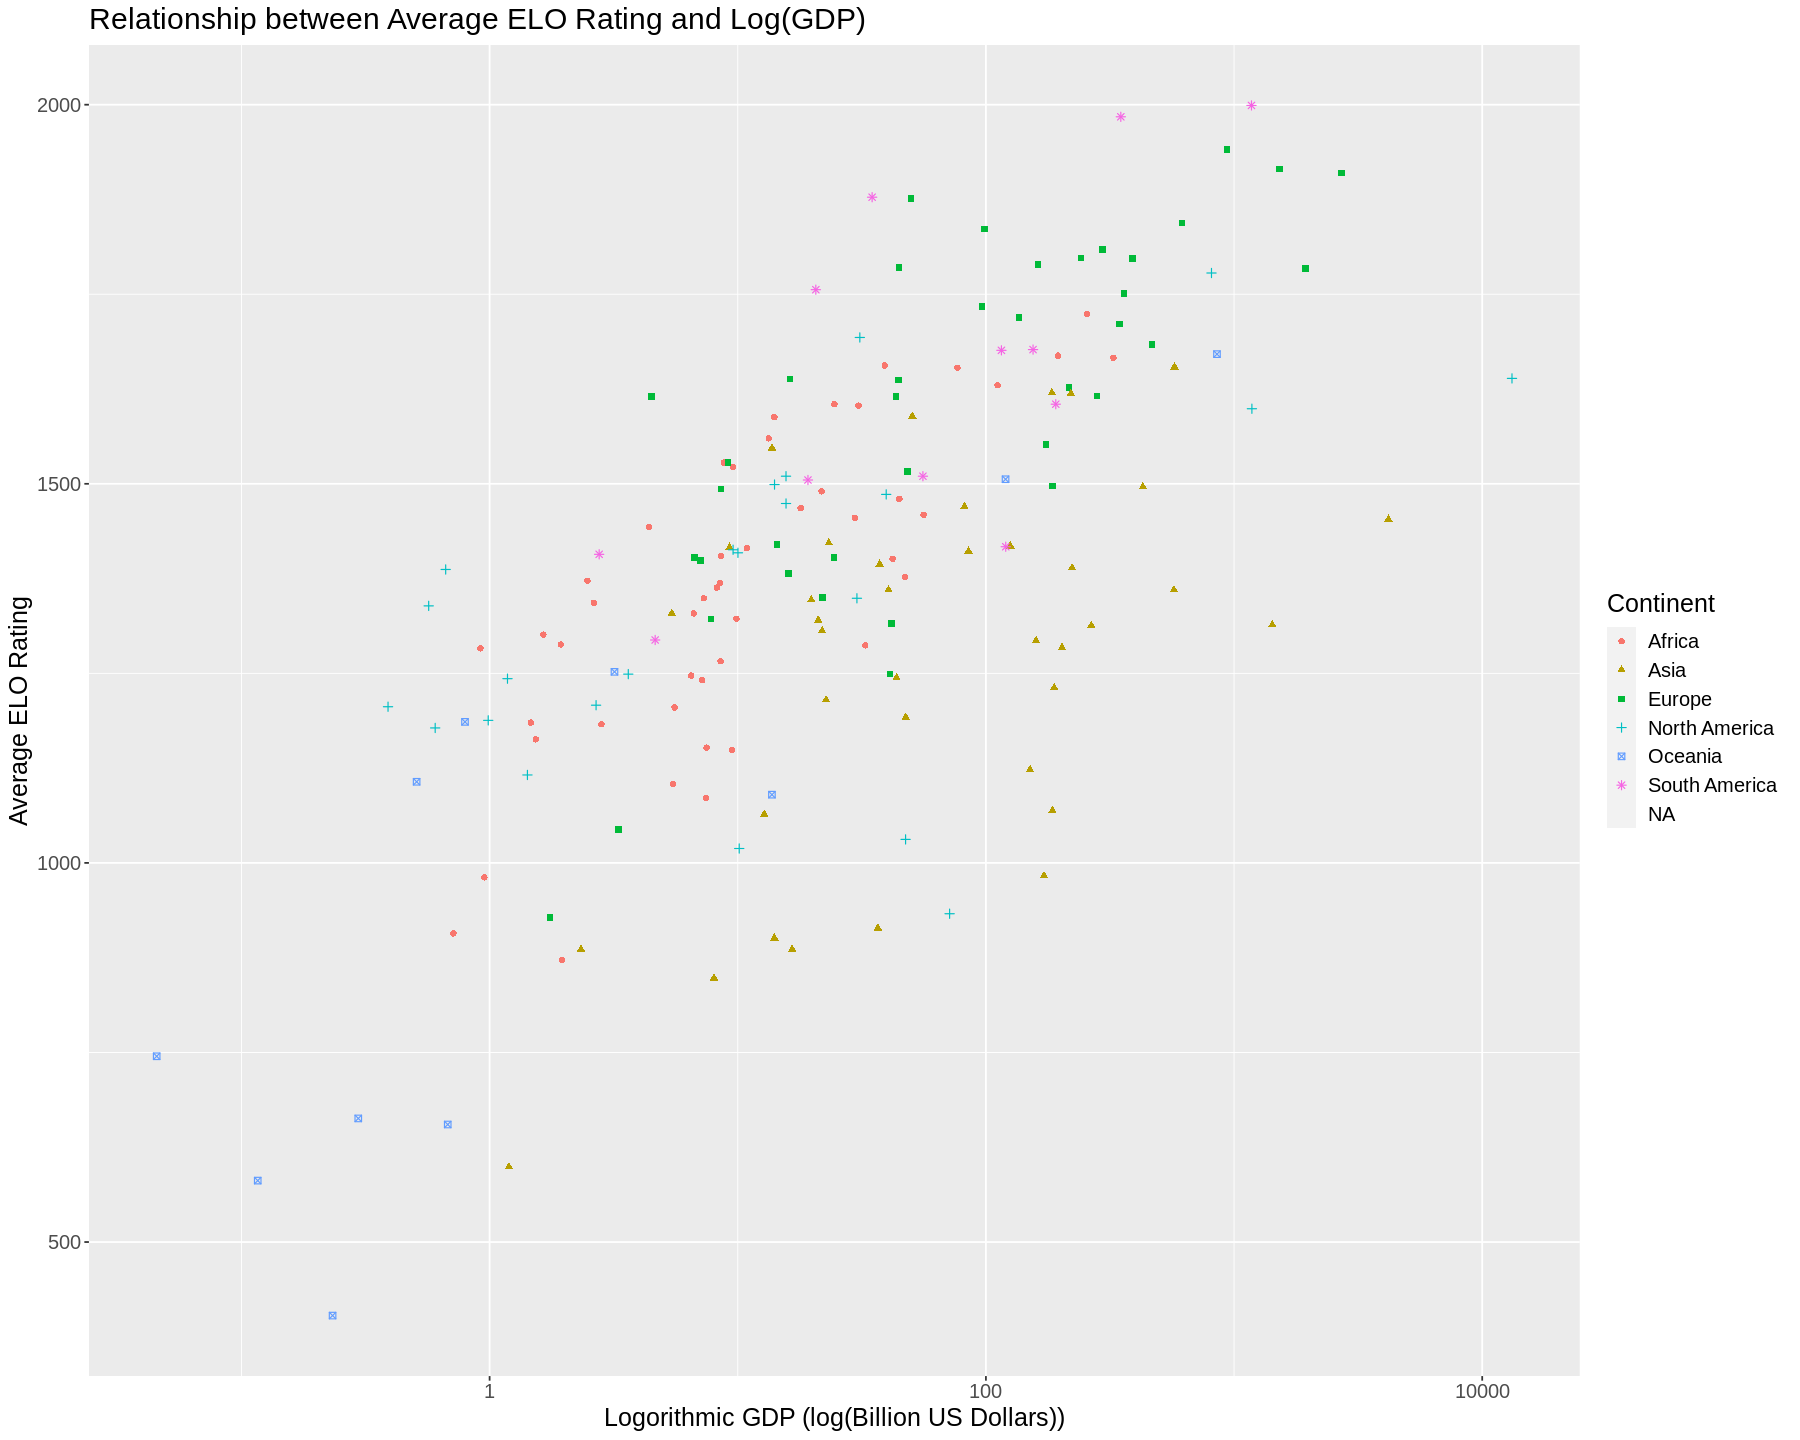

In [35]:
options(repr.plot.width = 15, repr.plot.height = 12)

# Comparing average_rating to Mean_GDP Logarithmically scaled
gdp_avg_rating_plot <- ggplot(soccer_data_combined, aes(x = Mean_GDP, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "Logorithmic GDP (log(Billion US Dollars))", y = "Average ELO Rating") +
    ggtitle("Relationship between Average ELO Rating and Log(GDP)") +
    theme(text = element_text(size = 15)) + 
    scale_x_continuous(trans = 'log10')

gdp_avg_rating_plot

Warning message:
“Removed 1 rows containing missing values (geom_point).”


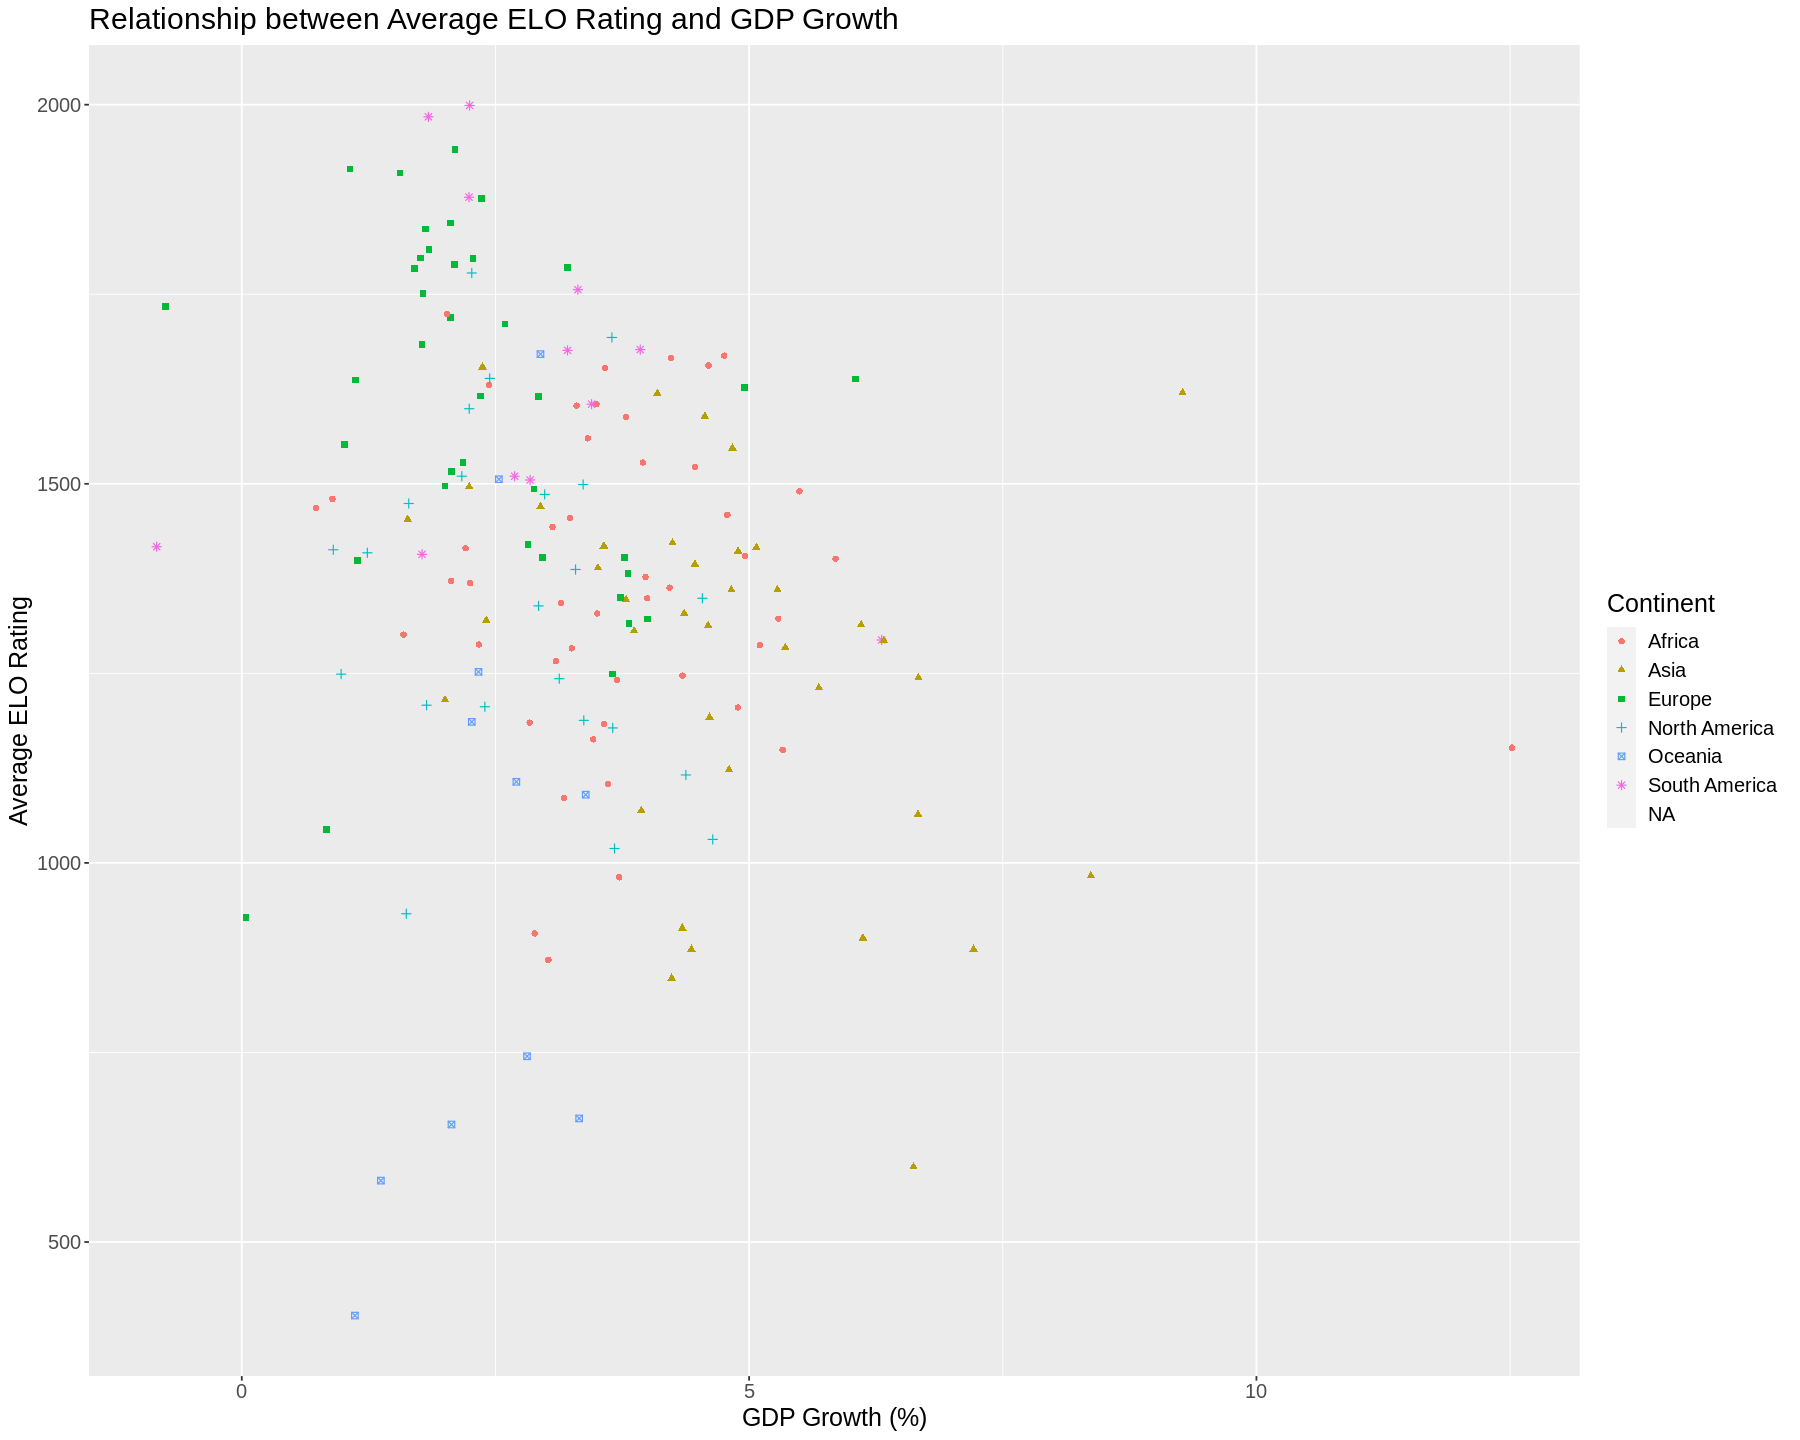

In [42]:
# GDP Growth with Points with Average ELO Rating

gdp_growth_plot <- ggplot(soccer_data_combined, aes(x = Mean_GDP_Growth, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "Average ELO Rating") +
    ggtitle("Relationship between Average ELO Rating and GDP Growth") +
    theme(text = element_text(size = 15))

gdp_growth_plot

Warning message:
“Removed 1 rows containing missing values (geom_point).”


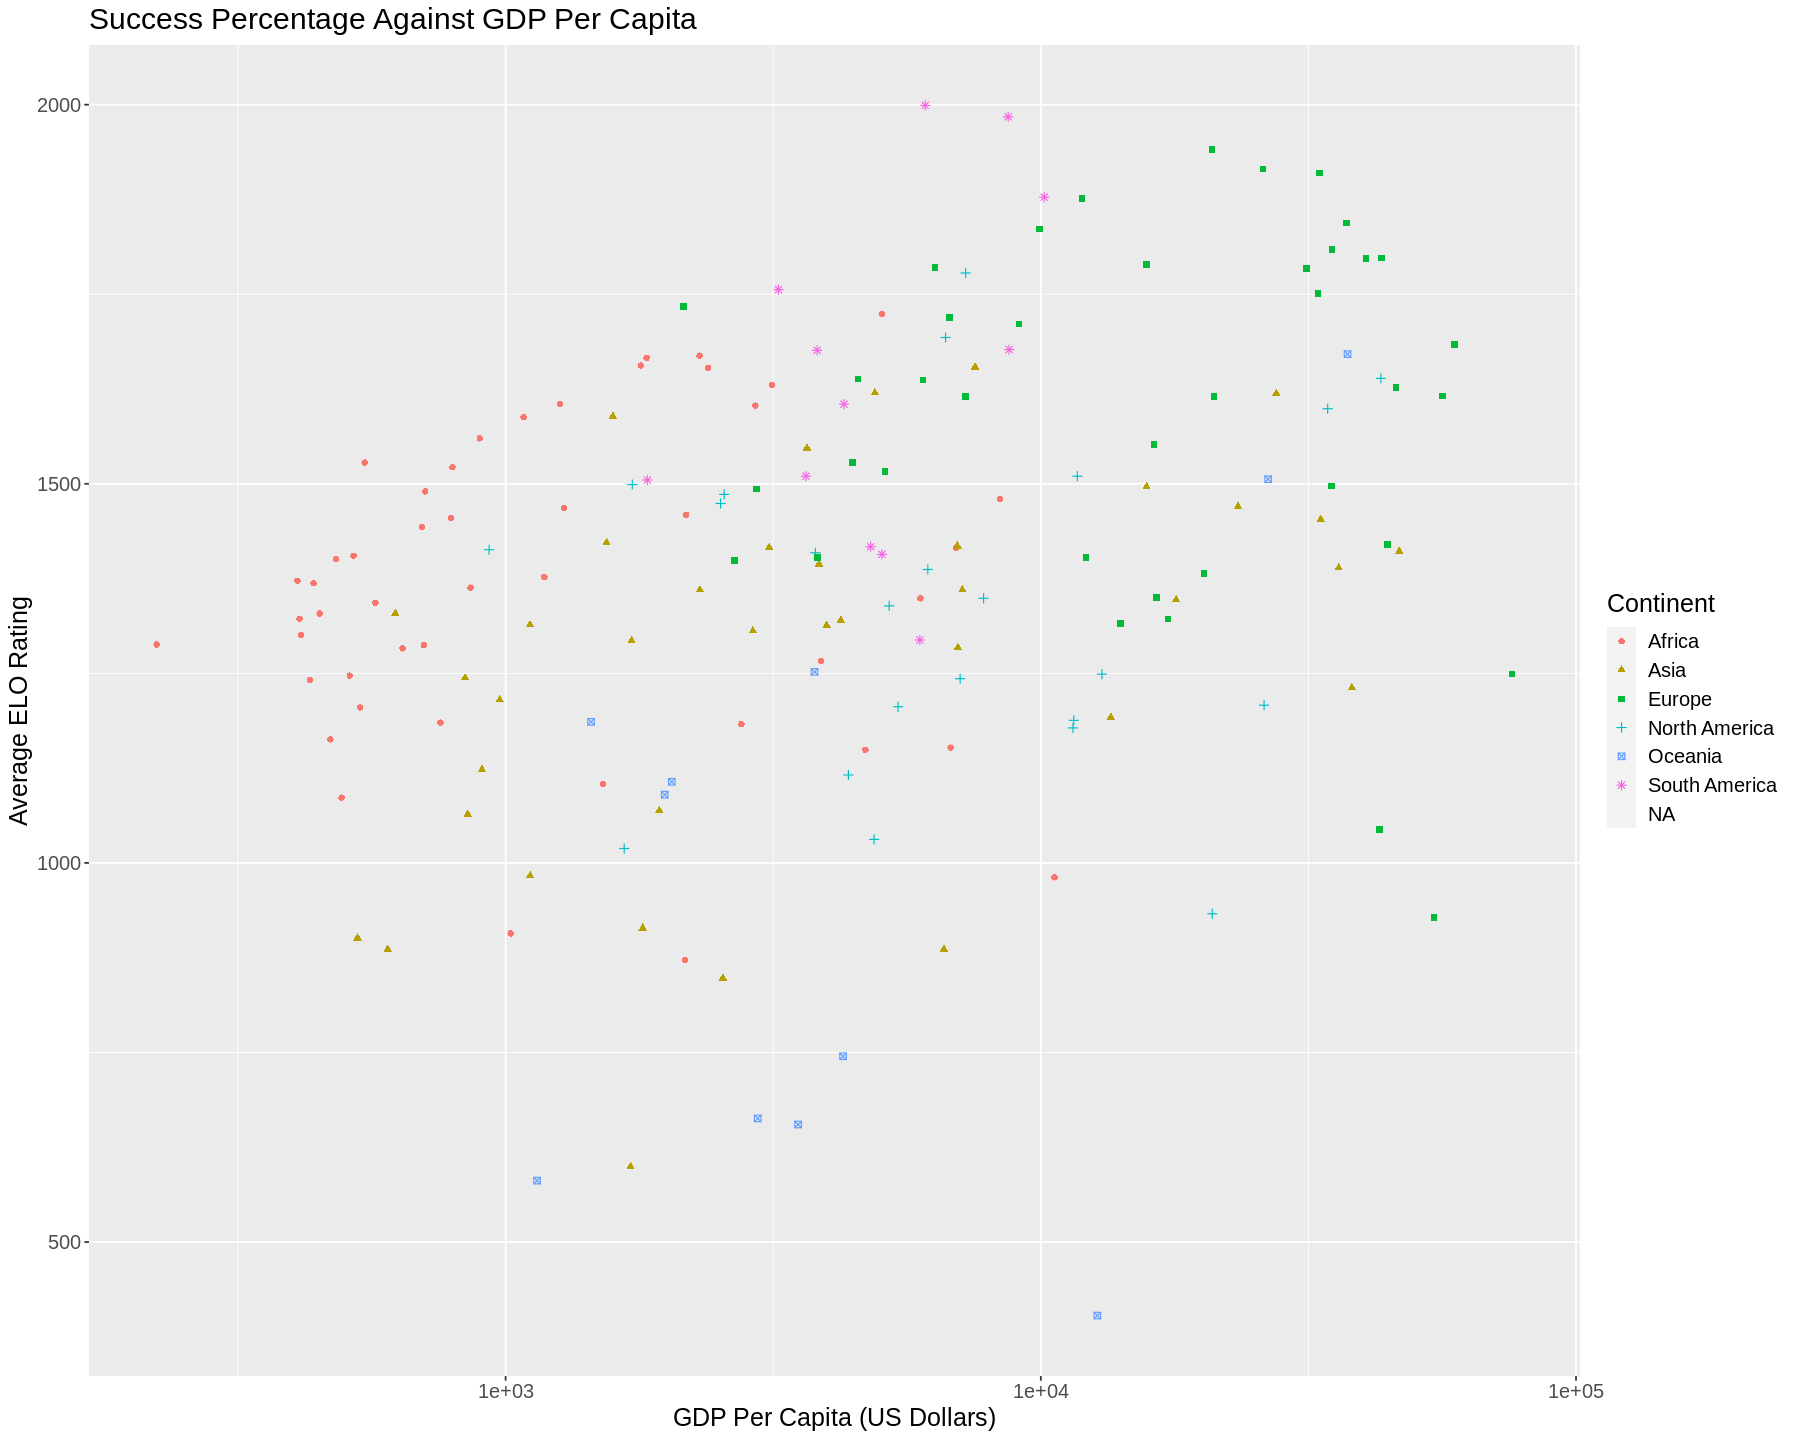

In [43]:
# GDP Per Capita with Average ELO Rating

gdp_capita_avg_rating_plot <- ggplot(soccer_data_combined, aes(x = Mean_GDP_Capita, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "Average ELO Rating") +
    ggtitle("Success Percentage Against GDP Per Capita") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(trans = 'log10')

gdp_capita_avg_rating_plot

In [19]:
# We need to create a new table which contains the log of the GDP Per Capita as well as eliminate
# other variables
soccer_data_combined <- soccer_data_combined |>
    mutate(log_Mean_GDP_Capita = log(Mean_GDP_Capita),
          log_Mean_GDP = log(Mean_GDP)) |>
    select(Country, Continent, average_rating, log_Mean_GDP_Capita, log_Mean_GDP)

soccer_data_combined

Country,Continent,average_rating,log_Mean_GDP_Capita,log_Mean_GDP
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,901,6.270647,2.641850
Albania,Europe,1493,7.987976,2.148433
Algeria,Africa,1630,8.053877,4.714172
⋮,⋮,⋮,⋮,⋮
Yemen,Asia,1215,6.882190,3.121985
Zambia,Africa,1560,6.796692,2.590312
Zimbabwe,Africa,1468,7.158483,2.886211


## Methods

## TODO: KNN Regression on Log GDP Per Capita and Average Rating

In [20]:
# Seperating Training and Testing Data to a 0.75:0.25 split
set.seed(2022)
soccer_split <- initial_split(soccer_data_combined, prop = 0.75, strata = average_rating)
soccer_training <- training(soccer_split)
soccer_testing <- testing(soccer_split)

In [21]:
set.seed(2022)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |>
    set_mode("regression")

soccer_recipe <- recipe(average_rating ~ log_Mean_GDP_Capita, data = soccer_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

soccer_vfold <- vfold_cv(soccer_training, v = 5, strata = log_Mean_GDP_Capita)

gridvals <- tibble(neighbors = seq(1,50))

soccer_results <- workflow() |>
    add_recipe(soccer_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = soccer_vfold, grid = gridvals) |>
    collect_metrics()

soccer_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,4.048839e+02,5,19.430476074,Preprocessor1_Model01
1,rsq,standard,8.834161e-03,5,0.002968967,Preprocessor1_Model01
2,rmse,standard,3.650644e+02,5,36.753654680,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,0.06481098,5,0.02979238,Preprocessor1_Model49
50,rmse,standard,284.46706252,5,36.94740061,Preprocessor1_Model50
50,rsq,standard,0.06249919,5,0.02492254,Preprocessor1_Model50


In [22]:
soccer_min <- soccer_results |>
    filter(.metric == "rmse") |>
    arrange(mean) |>
    head(1)

soccer_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
50,rmse,standard,284.4671,5,36.9474,Preprocessor1_Model50


In [23]:
set.seed(2022)

kmin <- soccer_min |>
    pull(neighbors)

soccer_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
    set_engine("kknn") |>
    set_mode("regression")

soccer_best_fit <- workflow() |>
    add_recipe(soccer_recipe) |>
    add_model(soccer_best_spec) |>
    fit(data = soccer_training)

soccer_summary <- soccer_best_fit |>
    predict(soccer_testing) |>
    bind_cols(soccer_testing) |>
    metrics(truth = average_rating, estimate = .pred)

soccer_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,275.2455319
rsq,standard,0.1467746
mae,standard,219.2922727


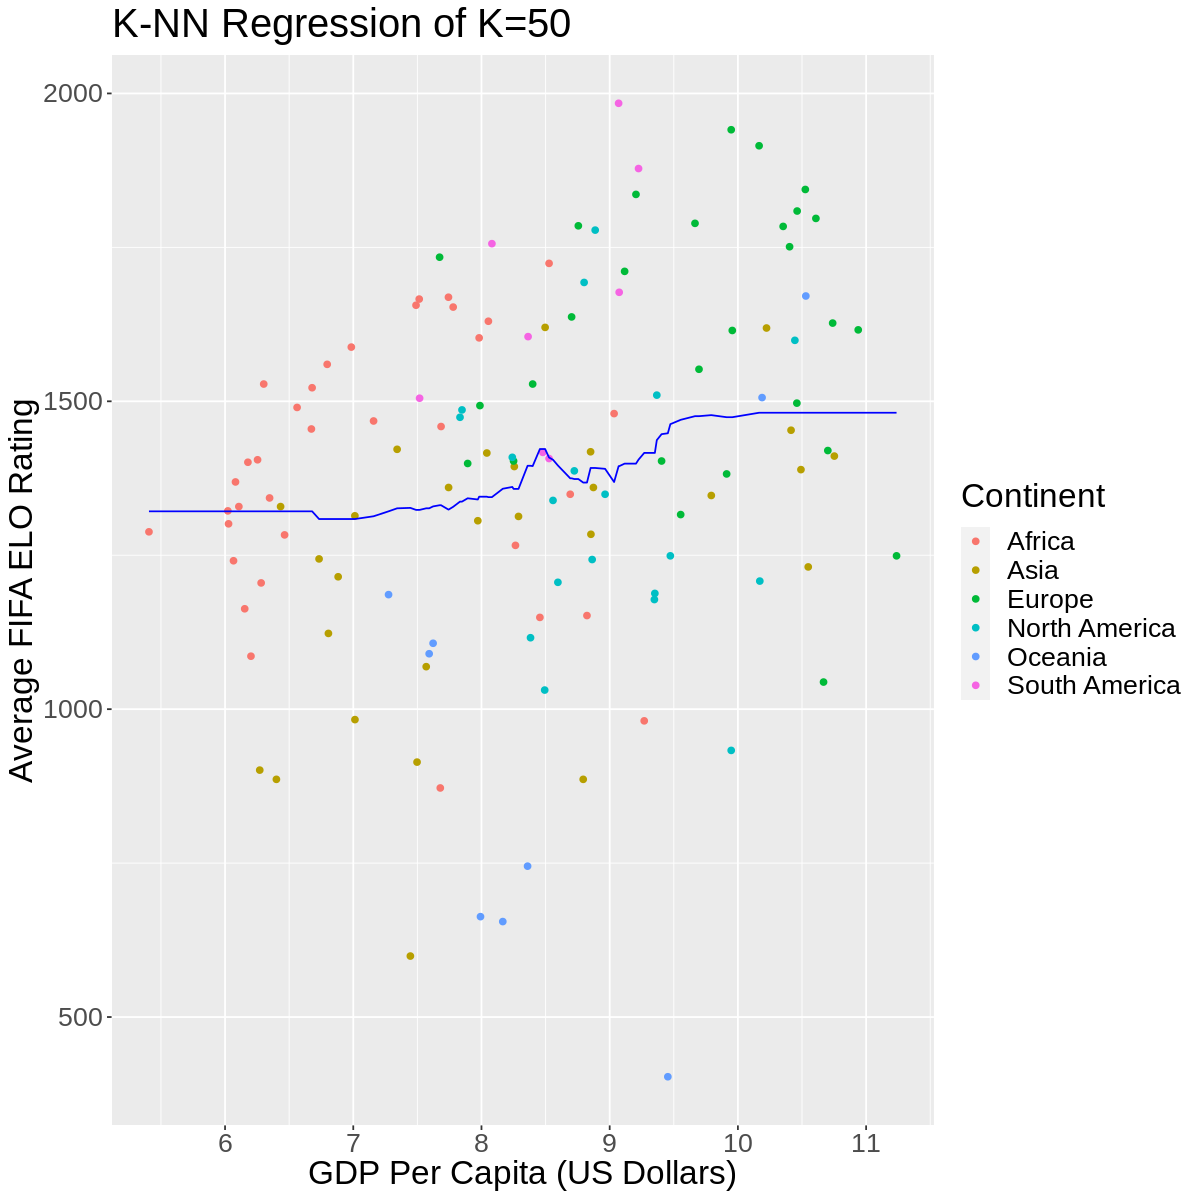

In [24]:
options(repr.plot.width = 10, repr.plot.height = 10)

soccer_preds <- soccer_best_fit |>
    predict(soccer_training) |>
    bind_cols(soccer_training)

soccer_plot <- ggplot(soccer_preds, aes(x = log_Mean_GDP_Capita, y = average_rating, color = Continent)) +
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)",
         y = "Average FIFA ELO Rating",
        color = "Continent") +
    geom_line(data = soccer_preds, aes(x = log_Mean_GDP_Capita, y = .pred), color = "blue") +
    ggtitle("K-NN Regression of K=50") +
    theme(text = element_text(size = 20))

soccer_plot

From the graph, the relationship between the GDP Per Capita and the Points Per 3 Games is very low.

First factor is that the continents have disparity between GDP Per Capita.

Second is that the majority of games are played within their own continents. So it is good to compare that to their performance to the actual World Cup Tournament

We are eventually going to look at world cup performances so maybe from the continents, we could predict the results of the actual tournament?

## TODO: Linear Regression on Log GDP and Average Rating

In [25]:
set.seed(2022)

lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

soccer_recipe <- recipe(average_rating ~ log_Mean_GDP, data = soccer_training)

soccer_fit <- workflow() |>
    add_recipe(soccer_recipe) |>
    add_model(lm_spec) |>
    fit(data = soccer_training)

soccer_fit

soccer_mult_test_results <- soccer_fit |>
    predict(soccer_training) |>
    bind_cols(soccer_training) |>
    metrics(truth = average_rating, estimate = .pred)

soccer_mult_test_results

lm_rmspe <- soccer_mult_test_results |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

lm_rmspe

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  log_Mean_GDP  
     1113.46         84.62  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,223.4536637
rsq,standard,0.4105704
mae,standard,175.0040972


[1] 223.4537

`geom_smooth()` using formula 'y ~ x'



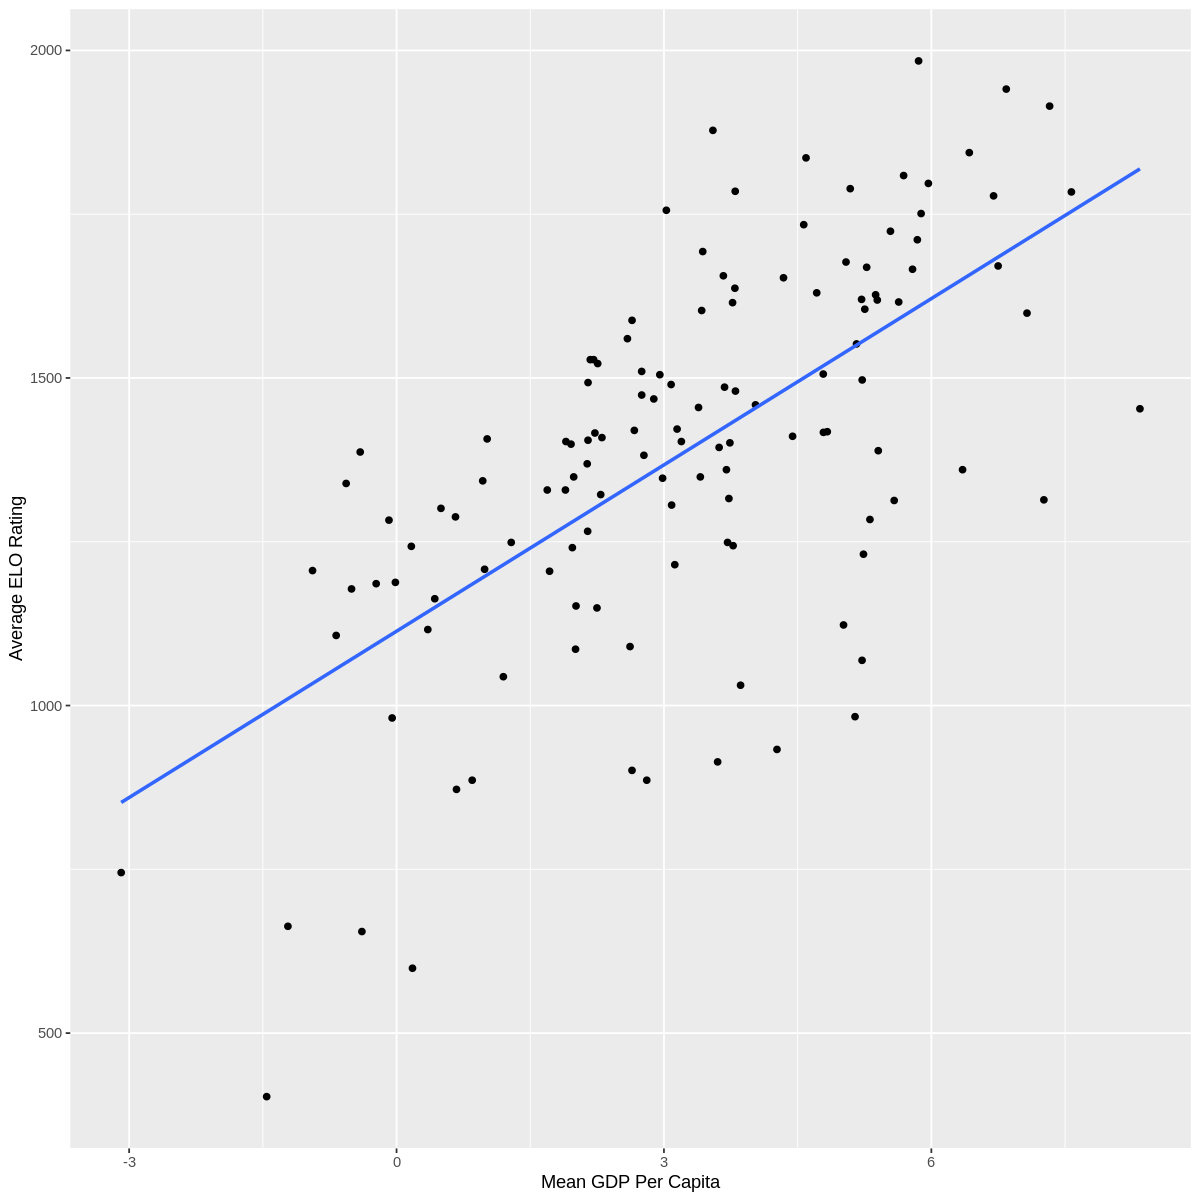

In [26]:
soccer_plot_lm <- ggplot(soccer_training, aes(x = log_Mean_GDP, y = average_rating)) +
    geom_point() +
    xlab("Mean GDP Per Capita") +
    ylab("Average ELO Rating") +
    geom_smooth(method = "lm", se = FALSE)

soccer_plot_lm

## Discussion

## Expected outcomes and significance

We expect our findings for the top 100 countries to show little/no relationship between the two variables. Since there will be several countries that are successful despite having a relatively low GDP, our graph will show an extremely general relationship. 

We think that our continent-specific plots will show a stronger relationship. By narrowing the sample down to a continental scale, we anticipate the relationship to be more accurate. This is because the disparities in GDP and success levels on a global scale can’t truly reflect the correlation. The continent data would give more precise results since the average GDP is extremely different for each.

From this project, we can try to figure out if bias in the global soccer world is real and if richer countries really do have an advantage in the sport. If we see that GDP generally has a weak relationship with success, then we can consider other factors that play a role (physical stature, climate, etc). If poorer countries are shown to be generally the same as (or better than) richer countries, we can ask how this is possible considering that poorer countries may not have as many resources as their richer counterparts.

## Future Questions

## References

### Data Sources
# CHANGE THESE TO APA FORMAT

- https://www.imf.org/external/datamapper/datasets/WEO

International Monetary Fund. (n.d.). World Economic Outlook (October 2022). International Monetary Fund - Homepage. Retrieved November 20, 2022, from https://www.imf.org/external/datamapper/datasets/WEO 

- https://www.rsssf.org/tablesw/wcq-records.html

Schaal, M. (2019, December 30). World Cup All-Time Tables (including Qualifying). World Cup all-time tables (including qualifying). Retrieved December 1, 2022, from https://www.rsssf.org/tablesw/wcq-records.html 

- https://ourworldindata.org/grapher/continents-according-to-our-world-in-data
- https://www.fifa.com/fifa-world-ranking/men?dateId=id13792
- https://www.eloratings.net/
- https://www.fifa.com/fifa-world-ranking/procedure-men